In [1]:
import pandas as pd
import numpy as np

In [2]:
#https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset
df = pd.read_csv('spam_or_not_spam.csv')

In [4]:
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [9]:
df[pd.isna(df.email)]

,email,label
2966,NaN,1


In [10]:
df.drop(df[pd.isna(df.email)].index, inplace=True)

In [11]:
df[pd.isna(df.label)]

,email,label


In [12]:
from sklearn.model_selection import train_test_split

X = df['email']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)

In [14]:
len(vectorizer.get_feature_names_out())

30958

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2399, 30958)

In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
X_test_counts = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [18]:
predicted = clf.predict(X_test_tfidf)
np.mean(predicted == y_test)

0.9033333333333333

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       504
           1       1.00      0.40      0.57        96

    accuracy                           0.90       600
   macro avg       0.95      0.70      0.76       600
weighted avg       0.91      0.90      0.89       600



In [20]:
metrics.confusion_matrix(y_test, predicted)

array([[504,   0],
       [ 58,  38]], dtype=int64)

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_counts,y_train)
    pred_i = knn.predict(X_test_counts)
    error_rate.append(np.mean(pred_i != y_test))

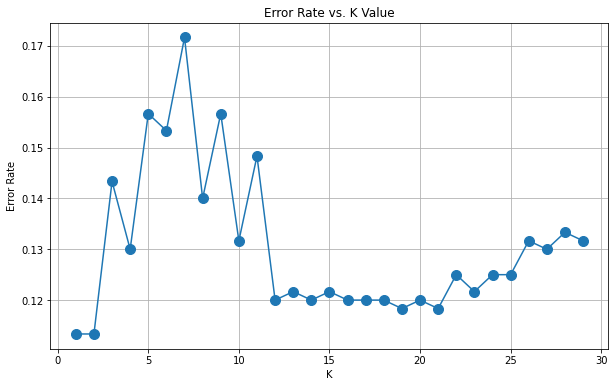

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [26]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_counts, y_train)

KNeighborsClassifier(n_neighbors=13)

In [28]:
pred = knn.predict(X_test_counts)

In [30]:
print(metrics.confusion_matrix(y_test,pred))

[[501   3]
 [ 70  26]]


In [32]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       504
           1       0.90      0.27      0.42        96

    accuracy                           0.88       600
   macro avg       0.89      0.63      0.67       600
weighted avg       0.88      0.88      0.85       600

